In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:


train = pd.read_csv("C:/projects/house price pridiction/train.csv")
test = pd.read_csv("C:/projects/house price pridiction/test.csv")




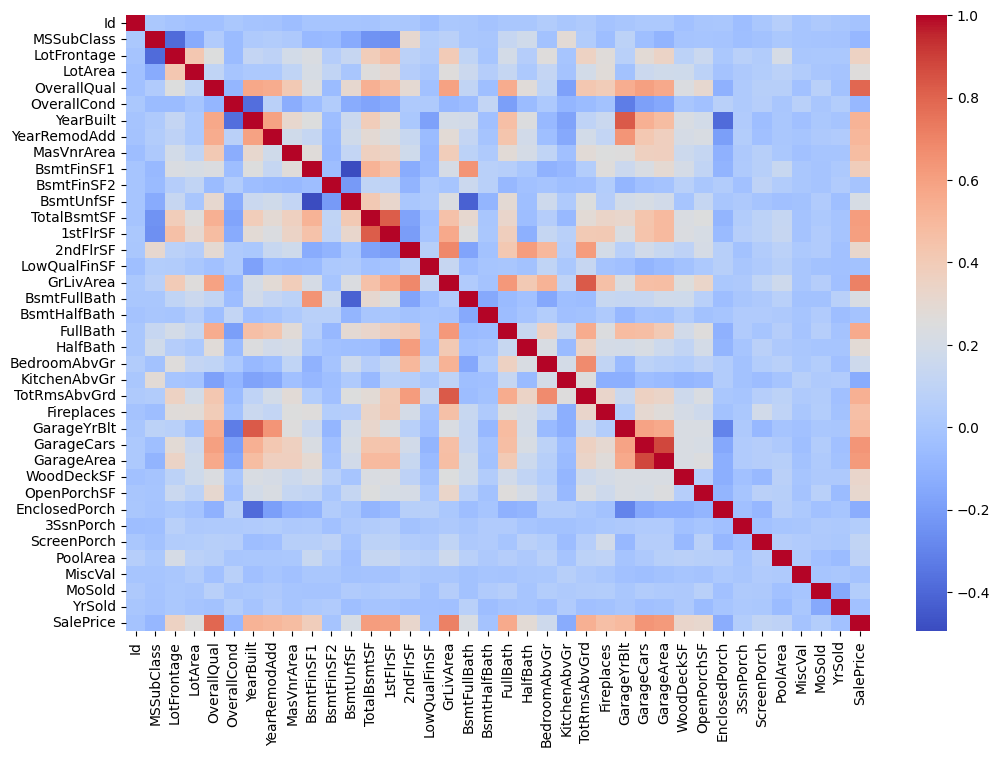

In [10]:

numeric_train = train.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_train.corr(), cmap="coolwarm", annot=False)
plt.show()



In [12]:
from sklearn.preprocessing import LabelEncoder


X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]


X = X.fillna("Missing")

# Encode categorical columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_val)
print("MAE:", mean_absolute_error(y_val, preds))


MAE: 17571.333184931507


In [18]:
import os
import pickle


os.makedirs("model", exist_ok=True)


with open("model/house_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully ")


Model saved successfully 


In [21]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import pickle

# Example dataset
df = pd.read_csv('house_data.csv')  # replace with your CSV
X = df[['area','bedrooms','bathrooms']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

# Save model
with open('model/house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)


FileNotFoundError: [Errno 2] No such file or directory: 'house_data.csv'